In [1]:
import numpy as np
import random
import os
import cv2
import pandas
import matplotlib.pyplot as plt
import imutils
import tensorflow as tf
from google.colab import drive
from sklearn.model_selection import KFold
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import model_from_json
from keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix
from numpy import mean
from numpy import std
from keras.datasets import mnist
from PIL import Image, ImageOps

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
location1 = "/content/gdrive/My Drive/Colab Notebooks/MultiDigit_CNN/"
location2 = "/content/gdrive/My Drive/Colab Notebooks/MNIST/"

In [4]:
test_data = np.load(location1 + 'Data/data9.npy')
print("Original dataset sizes:", test_data.shape)
test_data = np.expand_dims(test_data, axis=3)
print("New dataset sizes:", test_data.shape)

Original dataset sizes: (10000, 40, 168)
New dataset sizes: (10000, 40, 168, 1)


In [5]:
def resize_to_fit(image, width, height):
    
    deltaw = width - image.shape[1]
    deltah = height - image.shape[0]
    if (deltaw < 0 or deltah < 0):
      if (deltaw < 0):
        image = image[:, :28]
        deltaw = width - image.shape[1]
      if (deltah < 0):
        image = image[:28, :]
        deltah = height - image.shape[0]
    if (deltaw % 2 == 0):
      padW1 = int(deltaw/2)
      padW2 = padW1
    else:
      padW1 = int(deltaw/2)
      padW2 = padW1 + 1
    if (deltah % 2 == 0):
      padH1 = int(deltah/2)
      padH2 = padH1
    else:
      padH1 = int(deltah/2)
      padH2 = padH1 + 1
    image = cv2.copyMakeBorder(image, padH1, padH2, padW1, padW2, cv2.BORDER_CONSTANT, value=0)
    return image

In [6]:
choice = int(input("Do you want to load any saved model? Enter 1 for Yes and 0 for No: "))
if(choice == 1):

  acc_tr = int(input("Enter train accuracy rounded to the nearest integer: "))
  acc_va = int(input("Enter validation accuracy rounded to the nearest integer: "))
  file_name = location1 + 'model_' + str(acc_tr) + "_" + str(acc_va)

  # load json and create model
  json_file = open(file_name + '.json', 'r')
  loaded_model_json1 = json_file.read()
  json_file.close()
  loaded_model1 = model_from_json(loaded_model_json1)
  # load weights into new model
  loaded_model1.load_weights(file_name + ".h5")
  print("Loaded model from disk")

  # evaluate loaded model on test data
  loaded_model1.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

  predictions1_full = loaded_model1.predict(test_data)
  print(predictions1_full.shape)

Do you want to load any saved model? Enter 1 for Yes and 0 for No: 1
Enter train accuracy rounded to the nearest integer: 93
Enter validation accuracy rounded to the nearest integer: 80
Loaded model from disk
(10000, 37)


In [7]:
choice = int(input("Do you want to load any saved model? Enter 1 for Yes and 0 for No: "))
if(choice == 1):

  acc_tr = int(input("Enter train accuracy rounded to the nearest integer: "))
  acc_va = int(input("Enter validation accuracy rounded to the nearest integer: "))
  file_name = location2 + 'model_' + str(acc_tr) + "_" + str(acc_va)

  # load json and create model
  json_file = open(file_name + '.json', 'r')
  loaded_model_json2 = json_file.read()
  json_file.close()
  loaded_model2 = model_from_json(loaded_model_json2)
  # load weights into new model
  loaded_model2.load_weights(file_name + ".h5")
  print("Loaded model from disk")

  # evaluate loaded model on test data
  loaded_model2.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

Do you want to load any saved model? Enter 1 for Yes and 0 for No: 1
Enter train accuracy rounded to the nearest integer: 100
Enter validation accuracy rounded to the nearest integer: 9933
Loaded model from disk


In [8]:
choice = int(input("Do you want to load any saved model? Enter 1 for Yes and 0 for No: "))
if(choice == 1):

  acc_tr = int(input("Enter train accuracy rounded to the nearest integer: "))
  acc_va = int(input("Enter validation accuracy rounded to the nearest integer: "))
  file_name = location1 + 'model_' + str(acc_tr) + "_" + str(acc_va)

  # load json and create model
  json_file = open(file_name + '.json', 'r')
  loaded_model_json3 = json_file.read()
  json_file.close()
  loaded_model3 = model_from_json(loaded_model_json3)
  # load weights into new model
  loaded_model3.load_weights(file_name + ".h5")
  print("Loaded model from disk")

  # evaluate loaded model on test data
  loaded_model3.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
  
  temp_test_data = test_data.astype('float32')
  temp_test_data /= 255

  predictions3_full = loaded_model3.predict(temp_test_data)
  print(predictions3_full.shape)

Do you want to load any saved model? Enter 1 for Yes and 0 for No: 1
Enter train accuracy rounded to the nearest integer: 96
Enter validation accuracy rounded to the nearest integer: 75
Loaded model from disk
(10000, 37)


In [9]:
choice = int(input("Do you want to load any saved model? Enter 1 for Yes and 0 for No: "))
if(choice == 1):

  acc_tr = int(input("Enter train accuracy rounded to the nearest integer: "))
  acc_va = int(input("Enter validation accuracy rounded to the nearest integer: "))
  file_name = location1 + 'model_' + str(acc_tr) + "_" + str(acc_va)

  # load json and create model
  json_file = open(file_name + '.json', 'r')
  loaded_model_json4 = json_file.read()
  json_file.close()
  loaded_model4 = model_from_json(loaded_model_json4)
  # load weights into new model8
  loaded_model4.load_weights(file_name + ".h5")
  print("Loaded model from disk")

  # evaluate loaded model on test data
  loaded_model4.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

  predictions4_full = loaded_model4.predict(test_data)
  print(predictions4_full.shape)

Do you want to load any saved model? Enter 1 for Yes and 0 for No: 1
Enter train accuracy rounded to the nearest integer: 92
Enter validation accuracy rounded to the nearest integer: 81
Loaded model from disk
(10000, 37)


In [10]:
bad_image_count = 0
bad_image_dict = dict()

show = 0
start = 0
end = 10000

predictions2 = []

for (i,image) in enumerate(test_data[start:end]):

    if(i>0 and i%100 == 0):
      print(i, "Done")
      
    padded_image = cv2.copyMakeBorder(image, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

    if(show == 1):
      plt.imshow(padded_image)
      plt.show()
      
    # Finding the contours in the image
    contours = cv2.findContours(padded_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[1] if imutils.is_cv3() else contours[0]
    
    letter_image_regions = []

    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        
        if (w > 40):
            # print("Splitting into 3")
            # This contour is too wide to be a single letter, hence split
            onethird_width = int(w / 3)
            letter_image_regions.append((x, y, onethird_width, h))
            letter_image_regions.append((x + onethird_width, y, onethird_width, h))
            letter_image_regions.append((x + 2*onethird_width, y, onethird_width, h))
        
        elif (w > 20):
            # print("Splitting into 2")
            # This contour is too wide to be a single letter, hence split
            half_width = int(w / 2)
            letter_image_regions.append((x, y, half_width, h))
            letter_image_regions.append((x + half_width, y, half_width, h))
        
        elif (w< 3 or h<9):
            # print("Random pixel block")
            # Some error in contouring, ignore!
            continue
        
        else:
            letter_image_regions.append((x, y, w, h))
        
    # If less/more than 4 detected digits take note of the error
    if len(letter_image_regions) != 4:
        bad_image_count+=1
        if (str(len(letter_image_regions)) not in bad_image_dict):
            bad_image_dict[str(len(letter_image_regions))] = [i] 
        else:
            bad_image_dict[str(len(letter_image_regions))].append(i)

    # Sort the detected letter images based on the x coordinate
    letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])
    
    sum = 0

    for letter_bounding_box in letter_image_regions:
        x, y, w, h = letter_bounding_box
        letter_image = padded_image[y-2:y + h+2, x-2:x + w+2]
        modified_image = resize_to_fit(letter_image, 28, 28)
        modified_image = modified_image.astype('float32')

        # gauss = np.random.normal(0,1, modified_image.size)
        # gauss = gauss.reshape(modified_image.shape[0],modified_image.shape[1]).astype('float32')
        # modified_image += 4*gauss

        modified_image = cv2.bilateralFilter(modified_image, 7, 15, 15)

        modified_image /= 255.0
        
        if(show == 1):
          plt.imshow(modified_image)
          plt.show()
          plt.hist(modified_image.ravel(),10,[0,1])
          plt.show()

        model_prediction = np.argmax(loaded_model2.predict(modified_image.reshape(1, 28, 28, 1)),axis = 1)[0]
        if(show == 1):
          print(model_prediction)
        sum += model_prediction

    if(show == 1):
      print(train_lab[start+i], sum)

    predictions2.append(sum)

np.save(location2 + "predictions2_final_02", predictions2)

100 Done
200 Done
300 Done
400 Done
500 Done
600 Done
700 Done
800 Done
900 Done
1000 Done
1100 Done
1200 Done
1300 Done
1400 Done
1500 Done
1600 Done
1700 Done
1800 Done
1900 Done
2000 Done
2100 Done
2200 Done
2300 Done
2400 Done
2500 Done
2600 Done
2700 Done
2800 Done
2900 Done
3000 Done
3100 Done
3200 Done
3300 Done
3400 Done
3500 Done
3600 Done
3700 Done
3800 Done
3900 Done
4000 Done
4100 Done
4200 Done
4300 Done
4400 Done
4500 Done
4600 Done
4700 Done
4800 Done
4900 Done
5000 Done
5100 Done
5200 Done
5300 Done
5400 Done
5500 Done
5600 Done
5700 Done
5800 Done
5900 Done
6000 Done
6100 Done
6200 Done
6300 Done
6400 Done
6500 Done
6600 Done
6700 Done
6800 Done
6900 Done
7000 Done
7100 Done
7200 Done
7300 Done
7400 Done
7500 Done
7600 Done
7700 Done
7800 Done
7900 Done
8000 Done
8100 Done
8200 Done
8300 Done
8400 Done
8500 Done
8600 Done
8700 Done
8800 Done
8900 Done
9000 Done
9100 Done
9200 Done
9300 Done
9400 Done
9500 Done
9600 Done
9700 Done
9800 Done
9900 Done


In [ ]:
predictions2 = np.load(location2 + 'predictions2_final.npy') 
  
print("Predictions 2 shape:", predictions2.shape) 

Predictions 2 shape: (10000,)


In [ ]:
# print(bad_image_count)
# for key in bad_image_dict:
#     print("Number of images with " + str(key) + " detected digits: " + str(len(bad_image_dict[key])))    
# print("Printing wrongly localised image indices")
# print(bad_image_dict)

32
Number of images with 3 detected digits: 13
Number of images with 5 detected digits: 19
Printing wrongly localised image indices
{'3': [625, 755, 1065, 1551, 2399, 2925, 3330, 3687, 4069, 5155, 5644, 6875, 9171], '5': [947, 2446, 2967, 2968, 3042, 4432, 5042, 6661, 6692, 7047, 7334, 7572, 7902, 8179, 9265, 9697, 9711, 9786, 9963]}


In [11]:
predictions1 = np.argmax(predictions1_full, axis=1)
predictions3 = np.argmax(predictions3_full, axis=1)

all_agree = []
one_two_agree = []
one_three_agree = []
two_three_agree = []
none_agree = []

for i in range(10000):
  if (predictions1[i] == predictions2[i] and predictions1[i] == predictions3[i]):
    all_agree.append(i)
  elif (predictions1[i] == predictions2[i] and predictions1[i] != predictions3[i]):
    one_two_agree.append(i)
  elif (predictions1[i] != predictions2[i] and predictions1[i] == predictions3[i]):
    one_three_agree.append(i)
  elif (predictions1[i] != predictions2[i] and predictions2[i] == predictions3[i]):
    two_three_agree.append(i)
  elif (predictions1[i] != predictions2[i] and predictions1[i] != predictions3[i] and predictions2[i] != predictions3[i]):
    none_agree.append(i)

print("All agree:", len(all_agree))
print("1 and 2 agree:", len(one_two_agree))
print("1 and 3 agree:", len(one_three_agree))
print("2 and 3 agree:", len(two_three_agree))
print("None agree:", len(none_agree))

All agree: 5481
1 and 2 agree: 1164
1 and 3 agree: 1679
2 and 3 agree: 819
None agree: 857


In [12]:
predictions1 = np.argmax(predictions1_full, axis=1)
predictions3 = np.argmax(predictions3_full, axis=1)
predictions4 = np.argmax(predictions4_full, axis=1)

all_agree = []

four_disagree = []
three_disagree = []
two_disagree = []
one_disagree = []

one_two_agree = []
one_three_agree = []
one_four_agree = []
two_three_agree = []
two_four_agree = [] 

two_on_both_agree = [] # go with 2

none_agree = [] #go with 2


for i in range(10000):
  if (predictions1[i] == predictions2[i] and predictions1[i] == predictions3[i] and predictions1[i] == predictions4[i]):
    all_agree.append(i)

  elif (predictions1[i] == predictions2[i] and predictions1[i] == predictions3[i] and predictions1[i] != predictions4[i]):
    four_disagree.append(i)
  elif (predictions1[i] == predictions2[i] and predictions1[i] != predictions3[i] and predictions1[i] == predictions4[i]):
    three_disagree.append(i)
  elif (predictions1[i] != predictions2[i] and predictions1[i] == predictions3[i] and predictions1[i] == predictions4[i]):
    two_disagree.append(i)
  elif (predictions2[i] != predictions1[i] and predictions2[i] == predictions3[i] and predictions2[i] == predictions4[i]):
    one_disagree.append(i)
  
  elif (predictions1[i] == predictions2[i] and predictions1[i] != predictions3[i] and predictions1[i] != predictions4[i] and predictions3[i] != predictions4[i]):
    one_two_agree.append(i)
  elif (predictions1[i] == predictions3[i] and predictions1[i] != predictions2[i] and predictions1[i] != predictions4[i] and predictions2[i] != predictions4[i]):
    one_three_agree.append(i)
  elif (predictions1[i] == predictions4[i] and predictions1[i] != predictions2[i] and predictions1[i] != predictions3[i] and predictions2[i] != predictions3[i]):
    one_four_agree.append(i)
  elif (predictions2[i] == predictions3[i] and predictions2[i] != predictions1[i] and predictions2[i] != predictions4[i] and predictions1[i] != predictions4[i]):
    two_three_agree.append(i)
  elif (predictions2[i] == predictions4[i] and predictions2[i] != predictions1[i] and predictions2[i] != predictions3[i] and predictions1[i] != predictions3[i]):
    two_four_agree.append(i)

  elif (predictions1[i] == predictions2[i] and predictions1[i] != predictions3[i] and predictions3[i] == predictions4[i]):
    two_on_both_agree.append(i)
  elif (predictions1[i] == predictions3[i] and predictions1[i] != predictions4[i] and predictions2[i] == predictions4[i]):
    two_on_both_agree.append(i)
  elif (predictions1[i] == predictions4[i] and predictions1[i] != predictions2[i] and predictions2[i] == predictions3[i]):
    two_on_both_agree.append(i)

  elif (predictions1[i] != predictions2[i] and predictions1[i] != predictions3[i] and predictions1[i] != predictions4[i] 
        and predictions2[i] != predictions3[i] and predictions2[i] != predictions4[i] and predictions3[i] != predictions4[i]):
    none_agree.append(i)

print("All agree:", len(all_agree))

print("1 disagrees:", len(one_disagree))
print("2 disagrees:", len(two_disagree))
print("3 disagrees:", len(three_disagree))
print("4 disagrees:", len(four_disagree))

print("1 and 2 agree:", len(one_two_agree))
print("1 and 3 agree:", len(one_three_agree))
print("1 and 4 agree:", len(one_four_agree))
print("2 and 3 agree:", len(two_three_agree))
print("2 and 4 agree:", len(two_four_agree))

print("2 on both sides:",len(two_on_both_agree))

print("None agree:", len(none_agree))

All agree: 5010
1 disagrees: 575
2 disagrees: 1164
3 disagrees: 943
4 disagrees: 471
1 and 2 agree: 49
1 and 3 agree: 283
1 and 4 agree: 370
2 and 3 agree: 44
2 and 4 agree: 71
2 on both sides: 604
None agree: 133


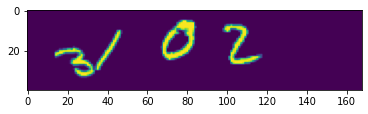

By model 1: 7
By model 2: 10
By model 3: 6
By model 4: 6


In [13]:
index = 41
plt.imshow(test_data[index].reshape(40, 168))
plt.show()
print("By model 1:", predictions1[index])
print("By model 2:", predictions2[index])
print("By model 3:", predictions3[index])
print("By model 4:", predictions4[index])

In [ ]:
def check_answers(X, pred1, pred2, pred3, pred4, ind):
  
  f = plt.figure(figsize=(20,4))
  axs1 = f.add_subplot(241)
  axs2 = f.add_subplot(242)
  axs3 = f.add_subplot(243)
  axs4 = f.add_subplot(244)
  axs5 = f.add_subplot(245)
  axs6 = f.add_subplot(246)
  axs7 = f.add_subplot(247)
  axs8 = f.add_subplot(248)
  axs1.imshow(X[ind[0], :, :, 0])
  axs1.set_title(" Preds: " + str(pred1[ind[0]]) + " "+ str(pred2[ind[0]]) + " " + str(pred3[ind[0]])+ " " + str(pred4[ind[0]]))
  axs2.imshow(X[ind[1], :, :, 0])
  axs2.set_title(" Preds: " + str(pred1[ind[1]]) + " "+ str(pred2[ind[1]]) + " " + str(pred3[ind[1]])+ " " + str(pred4[ind[1]]))
  axs3.imshow(X[ind[2], :, :, 0])
  axs3.set_title(" Preds: " + str(pred1[ind[2]]) + " "+ str(pred2[ind[2]]) + " " + str(pred3[ind[2]])+ " " + str(pred4[ind[2]]))
  axs4.imshow(X[ind[3], :, :, 0])
  axs4.set_title(" Preds: " + str(pred1[ind[3]]) + " "+ str(pred2[ind[3]]) + " " + str(pred3[ind[3]])+ " " + str(pred4[ind[3]]))
  axs5.imshow(X[ind[4], :, :, 0])
  axs5.set_title(" Preds: " + str(pred1[ind[4]]) + " "+ str(pred2[ind[4]]) + " " + str(pred3[ind[4]])+ " " + str(pred4[ind[4]]))
  axs6.imshow(X[ind[5], :, :, 0])
  axs6.set_title(" Preds: " + str(pred1[ind[5]]) + " "+ str(pred2[ind[5]]) + " " + str(pred3[ind[5]])+ " " + str(pred4[ind[5]]))
  axs7.imshow(X[ind[6], :, :, 0])
  axs7.set_title(" Preds: " + str(pred1[ind[6]]) + " "+ str(pred2[ind[6]]) + " " + str(pred3[ind[6]])+ " " + str(pred4[ind[6]]))
  axs8.imshow(X[ind[7], :, :, 0])
  axs8.set_title(" Preds: " + str(pred1[ind[7]]) + " "+ str(pred2[ind[7]]) + " " + str(pred3[ind[7]])+ " " + str(pred4[ind[7]]))

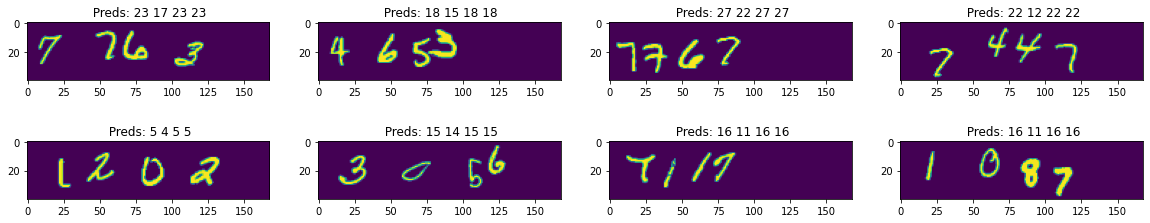

In [ ]:
check_answers(test_data, predictions1, predictions2, predictions3, predictions4, two_disagree[5:])

In [14]:
predictions_final = []

all_agree = []

four_disagree = []
three_disagree = []
two_disagree = []
one_disagree = []

one_two_agree = []
one_three_agree = []
one_four_agree = []
two_three_agree = []
two_four_agree = [] 
three_four_agree = []

two_on_both_agree = [] # go with 2

none_agree = [] #go with 2


for i in range(10000):

  if (predictions1[i] == predictions2[i] and predictions1[i] == predictions3[i] and predictions1[i] == predictions4[i]):
    all_agree.append(i)
    predictions_final.append(predictions1[i])

  elif (predictions1[i] == predictions2[i] and predictions1[i] == predictions3[i] and predictions1[i] != predictions4[i]):
    four_disagree.append(i)
    predictions_final.append(predictions1[i])

  elif (predictions1[i] == predictions2[i] and predictions1[i] != predictions3[i] and predictions1[i] == predictions4[i]):
    three_disagree.append(i)
    predictions_final.append(predictions1[i])

  elif (predictions1[i] != predictions2[i] and predictions1[i] == predictions3[i] and predictions1[i] == predictions4[i]):
    two_disagree.append(i)
    predictions_final.append(predictions1[i])

  elif (predictions2[i] != predictions1[i] and predictions2[i] == predictions3[i] and predictions2[i] == predictions4[i]):
    one_disagree.append(i)
    predictions_final.append(predictions2[i])
  
  elif (predictions1[i] == predictions2[i] and predictions1[i] != predictions3[i] and predictions1[i] != predictions4[i] and predictions3[i] != predictions4[i]):
    one_two_agree.append(i)
    predictions_final.append(predictions1[i])

  elif (predictions1[i] == predictions3[i] and predictions1[i] != predictions2[i] and predictions1[i] != predictions4[i] and predictions2[i] != predictions4[i]):
    one_three_agree.append(i)
    predictions_final.append(predictions1[i])

  elif (predictions1[i] == predictions4[i] and predictions1[i] != predictions2[i] and predictions1[i] != predictions3[i] and predictions2[i] != predictions3[i]):
    one_four_agree.append(i)
    predictions_final.append(predictions1[i])

  elif (predictions2[i] == predictions3[i] and predictions2[i] != predictions1[i] and predictions2[i] != predictions4[i] and predictions1[i] != predictions4[i]):
    two_three_agree.append(i)
    predictions_final.append(predictions2[i])

  elif (predictions2[i] == predictions4[i] and predictions2[i] != predictions1[i] and predictions2[i] != predictions3[i] and predictions1[i] != predictions3[i]):
    two_four_agree.append(i)
    predictions_final.append(predictions2[i])

  elif (predictions3[i] == predictions4[i] and predictions2[i] != predictions1[i] and predictions2[i] != predictions3[i] and predictions1[i] != predictions3[i]):
    three_four_agree.append(i)
    predictions_final.append(predictions3[i])

  elif (predictions1[i] == predictions2[i] and predictions1[i] != predictions3[i] and predictions3[i] == predictions4[i]):
    two_on_both_agree.append(i)
    predictions_final.append(predictions2[i])

  elif (predictions1[i] == predictions3[i] and predictions1[i] != predictions4[i] and predictions2[i] == predictions4[i]):
    two_on_both_agree.append(i)
    predictions_final.append(predictions2[i])

  elif (predictions1[i] == predictions4[i] and predictions1[i] != predictions2[i] and predictions2[i] == predictions3[i]):
    two_on_both_agree.append(i)
    predictions_final.append(predictions2[i])

  elif (predictions1[i] != predictions2[i] and predictions1[i] != predictions3[i] and predictions1[i] != predictions4[i] 
        and predictions2[i] != predictions3[i] and predictions2[i] != predictions4[i] and predictions3[i] != predictions4[i]):
    none_agree.append(i)
    predictions_final.append(predictions2[i])

print("All agree:", len(all_agree))

print("1 disagrees:", len(one_disagree))
print("2 disagrees:", len(two_disagree))
print("3 disagrees:", len(three_disagree))
print("4 disagrees:", len(four_disagree))

print("1 and 2 agree:", len(one_two_agree))
print("1 and 3 agree:", len(one_three_agree))
print("1 and 4 agree:", len(one_four_agree))
print("2 and 3 agree:", len(two_three_agree))
print("2 and 4 agree:", len(two_four_agree))
print("3 and 4 agree:", len(three_four_agree))

print("2 on both sides:",len(two_on_both_agree))

print("None agree:", len(none_agree))

All agree: 5010
1 disagrees: 575
2 disagrees: 1164
3 disagrees: 943
4 disagrees: 471
1 and 2 agree: 49
1 and 3 agree: 283
1 and 4 agree: 370
2 and 3 agree: 44
2 and 4 agree: 71
3 and 4 agree: 283
2 on both sides: 604
None agree: 133


In [15]:
np.save(location2 + "predictions_final_01", predictions_final)